<a href="https://colab.research.google.com/github/wdon021/Comp261_A5/blob/master/COMP421_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
mean = [0, 0, 0]
cov = [[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]

In [3]:
# https://en.wikipedia.org/wiki/N-sphere uni

In [4]:
# generating random point for unit sphere # normalizd it by euclidean distance 
# Multiply each number by 1/√ (x^2+y^2+z^2) (a.k.a. Normalise) . You should handle what happens if x=y=z=0.
# Multiply each number by the radius of your sphere.

In [5]:
def unit_sphere(data):
  return np.array([[coord / math.sqrt(sum(coords * coords for coords in line)) for coord in line] for line in data])

In [6]:
united = np.random.multivariate_normal(mean, cov,10000)

In [7]:
x11, x22, x33 = united.T

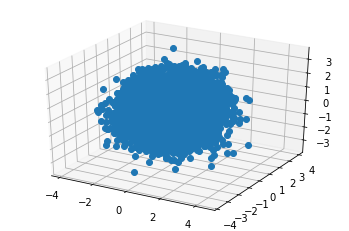

In [8]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x11, x22, x33, 'o')

In [9]:
united_y = unit_sphere(united)

### Training test validation split


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(united, united_y, test_size = 0.2)

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25)

In [12]:
x111, x112, x113 = Y_train.T

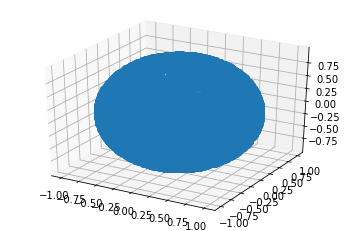

In [13]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x111, x112, x113, 'o')

## Build Model

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import keras

In [15]:
model = Sequential()
model.add(Dense(3, input_dim = 3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='linear'))

In [16]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# should use grid search

In [18]:
model.fit(x= X_train, y=Y_train, epochs=50, validation_data=[X_val, Y_val] )

Train on 6000 samples, validate on 2000 samples
Epoch 1/50
6000/6000 [==============================] - 1s 95us/step - loss: 0.2573 - accuracy: 0.7115 - val_loss: 0.1867 - val_accuracy: 0.7635
Epoch 2/50
6000/6000 [==============================] - 0s 51us/step - loss: 0.1333 - accuracy: 0.8613 - val_loss: 0.0899 - val_accuracy: 0.8770
Epoch 3/50
6000/6000 [==============================] - 0s 46us/step - loss: 0.0721 - accuracy: 0.8877 - val_loss: 0.0567 - val_accuracy: 0.8870
Epoch 4/50
6000/6000 [==============================] - 0s 43us/step - loss: 0.0481 - accuracy: 0.9080 - val_loss: 0.0375 - val_accuracy: 0.9190
Epoch 5/50
6000/6000 [==============================] - 0s 46us/step - loss: 0.0331 - accuracy: 0.9278 - val_loss: 0.0278 - val_accuracy: 0.9300
Epoch 6/50
6000/6000 [==============================] - 0s 41us/step - loss: 0.0259 - accuracy: 0.9330 - val_loss: 0.0241 - val_accuracy: 0.9330
Epoch 7/50
6000/6000 [==============================] - 0s 41us/step - loss: 0.022

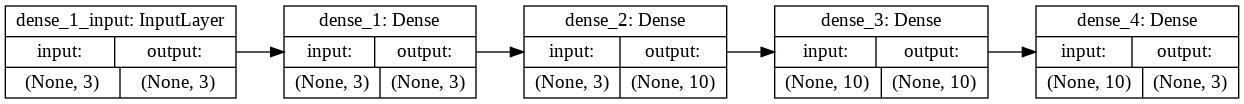

In [21]:
keras.utils.plot_model(model, show_shapes = True, rankdir = 'LR')

In [30]:
predictions = model.predict(Y_test)

In [32]:
Y_test

array([[ 0.68427886,  0.1354198 , -0.71653606],
       [-0.47640472, -0.33367717,  0.81344827],
       [-0.96063225,  0.04741863, -0.27374651],
       ...,
       [ 0.42526435,  0.67964188, -0.59769319],
       [-0.8225215 ,  0.11326597,  0.55734119],
       [-0.96234834,  0.26415533,  0.06409089]])

In [31]:
predictions

array([[ 0.6280936 ,  0.14475945, -0.77614206],
       [-0.55435735, -0.32463646,  0.7938987 ],
       [-0.9252215 ,  0.0837943 , -0.22907458],
       ...,
       [ 0.40050822,  0.64641964, -0.66012543],
       [-0.8306015 ,  0.13727373,  0.5798863 ],
       [-0.99088347,  0.2898326 ,  0.06655101]], dtype=float32)

In [22]:
model.output

<tf.Tensor 'dense_4/BiasAdd:0' shape=(None, 3) dtype=float32>